# 01. Neural Network Regression with TensorFlow

In [386]:
import tensorflow as tf
import pandas as pd
import numpy as np
import kagglehub
import matplotlib.pyplot as plt
from tensorflow import keras

In [387]:
print(f"tf.__version__ = {tf.__version__}")
print(f"pd.__version__ = {pd.__version__}")
print(f"np.__version__ = {np.__version__}")
print(f"keras.__version__ = {keras.__version__}")

tf.__version__ = 2.19.0
pd.__version__ = 2.2.2
np.__version__ = 2.0.2
keras.__version__ = 3.10.0


In [388]:
tf.config.list_physical_devices('GPU')

[]

In [389]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

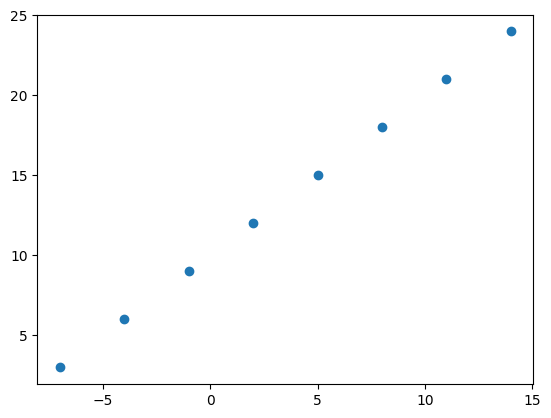

In [390]:
plt.scatter(X, y)
plt.show()

In [391]:
house_info = tf.constant([
    'bedroom', 'bathroom', 'garage'
])
house_price = tf.constant([939700])

In [392]:
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [393]:
house_info.shape, house_price.shape

(TensorShape([3]), TensorShape([1]))

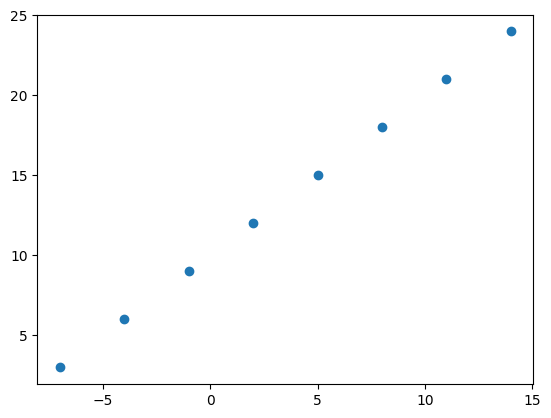

In [394]:
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X,y)
plt.show()

In [395]:
X[0].shape

TensorShape([])

In [396]:
X.shape

TensorShape([8])

In [397]:
y.shape

TensorShape([8])

In [398]:
y[0].shape

TensorShape([])

In [399]:
X[0]

<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>

In [400]:
y[0]

<tf.Tensor: shape=(), dtype=float32, numpy=3.0>

In [401]:
tf.random.set_seed(42)

In [402]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

In [403]:
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

In [404]:
X.shape

TensorShape([8])

In [405]:
model.fit(tf.expand_dims(X,axis=-1), y, epochs=5, verbose=0)

In [406]:
tf.reduce_max(X),tf.reduce_min(X)

(<tf.Tensor: shape=(), dtype=float32, numpy=14.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-7.0>)

In [407]:
tf.reduce_max(y),tf.reduce_min(y)

(<tf.Tensor: shape=(), dtype=float32, numpy=24.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

In [408]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [409]:
model.predict(np.array([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([[25.42312]], dtype=float32)

In [410]:
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [411]:
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [412]:
y = X + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [413]:
len(X), len(y)

(50, 50)

In [414]:
X_train = X[:40]
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

In [415]:
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

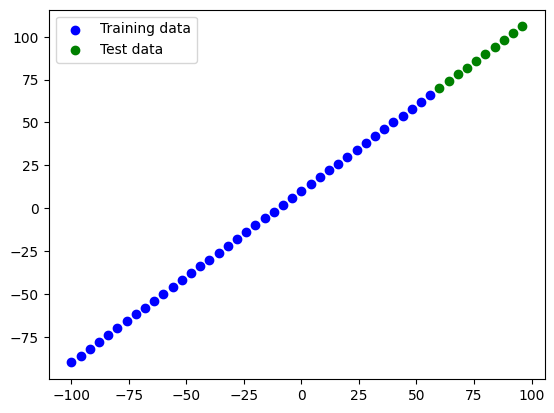

In [416]:
plt.scatter(X_train, y_train, c='b', label="Training data")
plt.scatter(X_test, y_test, c='g', label="Test data")
plt.legend()
plt.show()

In [417]:
tf.random.set_seed(42)

model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=[1]),
        tf.keras.layers.Dense(1)
    ]
)
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

In [418]:
model.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_88 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [419]:
y_train

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66])

In [420]:
model.fit(X_train, y_train, epochs=200, verbose=0)

In [421]:
model.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_88 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

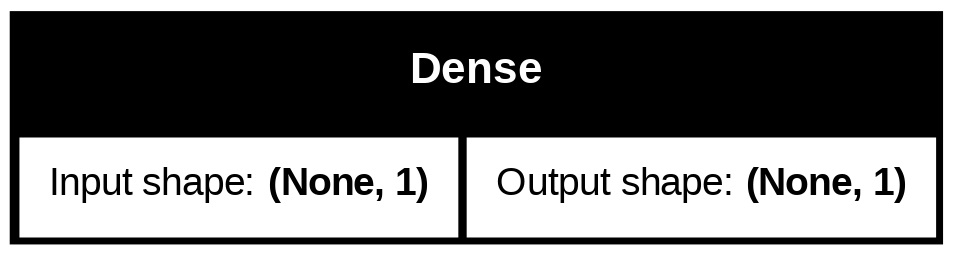

In [422]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [423]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [424]:
y_pred

array([[ 72.76496 ],
       [ 77.43117 ],
       [ 82.097374],
       [ 86.76358 ],
       [ 91.42979 ],
       [ 96.09599 ],
       [100.76219 ],
       [105.4284  ],
       [110.094604],
       [114.76081 ]], dtype=float32)

In [425]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test,test_labels=y_test, predictions=y_pred):

    plt.scatter(train_data, train_labels, c='b', label='Training Data')
    plt.scatter(test_data, test_labels, c='r', label='Test Data')
    plt.scatter(test_labels, predictions, c='g', label='Predicted Data')
    plt.legend()
    plt.show()

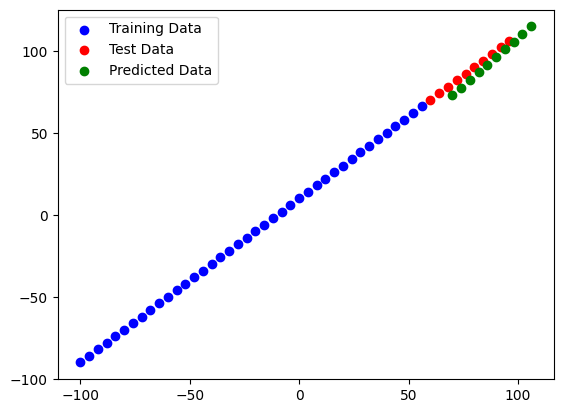

In [426]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

In [427]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 5.7629 - mae: 5.7629


[5.762887001037598, 5.762887001037598]

In [428]:
model.evaluate(X_train, y_train)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11.9271 - mae: 11.9271


[11.112139701843262, 11.112139701843262]

In [429]:
y_test.shape, y_pred.shape

((10,), (10, 1))

In [430]:
y_pred.squeeze().shape

(10,)

In [431]:
mae = tf.keras.losses.MeanAbsoluteError()(y_test, y_pred.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=5.762887001037598>

In [432]:
mse = tf.keras.losses.MeanSquaredError()(y_test, y_pred.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=36.87245559692383>

In [433]:
np.sqrt(68.74656677246094)

np.float64(8.29135494189345)

In [434]:
np.square(8.023613929748535)

np.float64(64.37838049365473)

In [435]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1)
    ]
)

model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


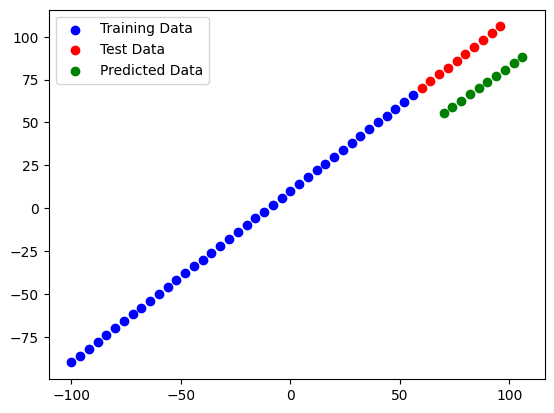

In [436]:
ypred_1 = model_1.predict(X_test)
plot_predictions(predictions=ypred_1)

In [437]:
mae_1 = tf.keras.losses.MeanAbsoluteError()(y_test, ypred_1.squeeze()).numpy()
mse_1 = tf.keras.losses.MeanSquaredError()(y_test, ypred_1.squeeze()).numpy()

print(f"Mean Absolute Error = {mae:.2f}")
print(f"Mean Squared Error = {mse:.2f}")

Mean Absolute Error = 5.76
Mean Squared Error = 36.87


In [438]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1),
        tf.keras.layers.Dense(1)
    ]
)

model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


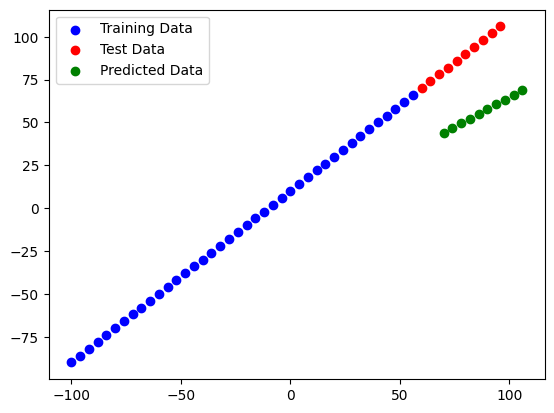

In [439]:
ypred_2 = model_2.predict(X_test)
plot_predictions(predictions=ypred_2)

In [440]:
mae_2 = tf.keras.losses.MeanAbsoluteError()(y_test, ypred_2.squeeze()).numpy()
mse_2 = tf.keras.losses.MeanSquaredError()(y_test, ypred_2.squeeze()).numpy()

print(f"Mean Absolute Error = {mae_2:.2f}")
print(f"Mean Squared Error = {mse_2:.2f}")

Mean Absolute Error = 31.57
Mean Squared Error = 1008.97


In [441]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1),
        tf.keras.layers.Dense(1)
    ]
)

model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=600, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


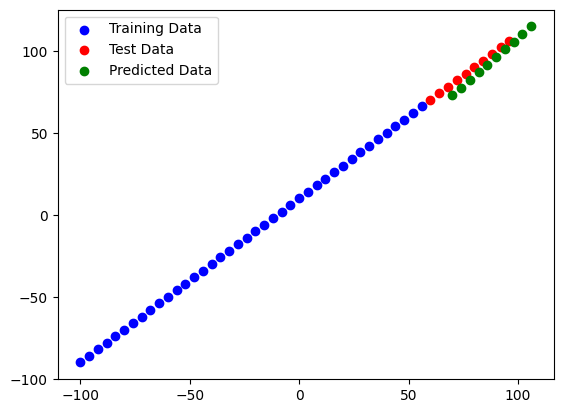

In [442]:
ypred_3 = model.predict(X_test)
plot_predictions(predictions=ypred_3)

In [443]:
mae_3 = tf.keras.losses.MeanAbsoluteError()(y_test, ypred_3.squeeze()).numpy()
mse_3 = tf.keras.losses.MeanSquaredError()(y_test, ypred_3.squeeze()).numpy()

print(f"Mean Absolute Error = {mae_3:.2f}")
print(f"Mean Squared Error = {mse_3:.2f}")

Mean Absolute Error = 5.76
Mean Squared Error = 36.87


In [444]:
print("MAE and MSE of different models")
print()
print(f"model_1 mae = {mae_1:.2f}")
print(f"model_1 mse = {mse_1:.2f}")
print()
print(f"model_2 mae = {mae_2:.2f}")
print(f"model_2 mse = {mse_2:.2f}")
print()
print(f"model_3 mae = {mae_3:.2f}")
print(f"model_3 mse = {mse_3:.2f}")


MAE and MSE of different models

model_1 mae = 16.15
model_1 mse = 262.04

model_2 mae = 31.57
model_2 mse = 1008.97

model_3 mae = 5.76
model_3 mse = 36.87


In [445]:
model_results = pd.DataFrame({
    'model':['model_1', 'model_2', 'model_3'],
    'mae':[mae_1, mae_2, mae_3],
    'mse':[mse_1, mse_2, mse_3]
})
model_results

,model,mae,mse
0,model_1,16.149479,262.038513
1,model_2,31.572226,1008.966187
2,model_3,5.762887,36.872456


In [446]:
model_1.save("model.keras")

In [447]:
model = tf.keras.models.load_model('model.keras')

In [448]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


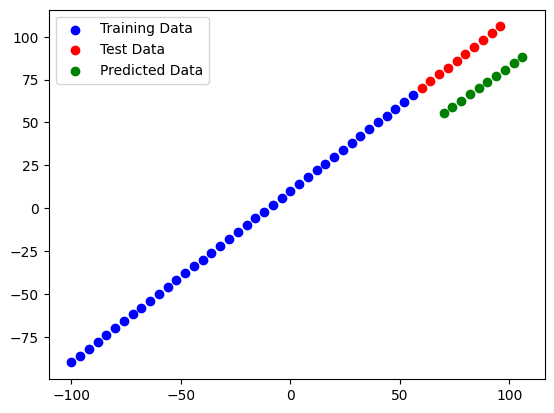

In [449]:
plot_predictions(predictions=y_pred)

In [450]:
# Read in the insurance dataset
df= pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [451]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [452]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [453]:
df = pd.get_dummies(df,dtype=int)

In [454]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [455]:
X = df.drop(columns=['charges'], axis=1)
y = df['charges']

In [456]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [457]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [458]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [460]:
df_model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1),
        tf.keras.layers.Dense(1)
    ]
)

df_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

df_model.fit(X_train, y_train, epochs=100, verbose=0)

In [461]:
df['charges'].max()

63770.42801

In [462]:
df['charges'].min()

1121.8739

In [463]:
df_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8518.7988 - mae: 8518.7988  


[8515.5908203125, 8515.5908203125]

In [464]:
df_model_2 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
    ]
)

df_model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

history = df_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [465]:
df_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4790.2920 - mae: 4790.2920  


[4658.2919921875, 4658.2919921875]

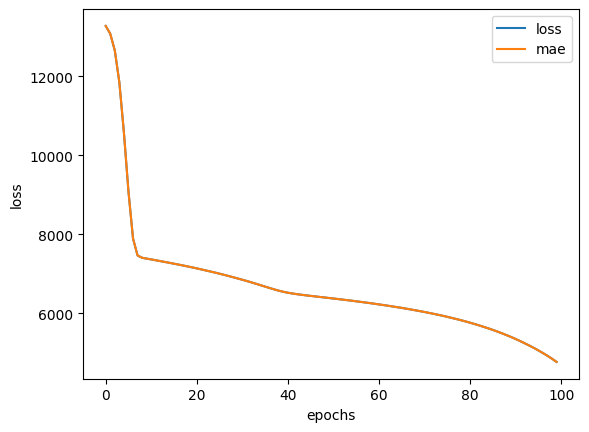

In [466]:
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [467]:
history_2 = df_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [468]:
df_model_2.evaluate(X_test, y_test)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3605.6619 - mae: 3605.6619

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3456.6750 - mae: 3456.6750 


[3391.877197265625, 3391.877197265625]

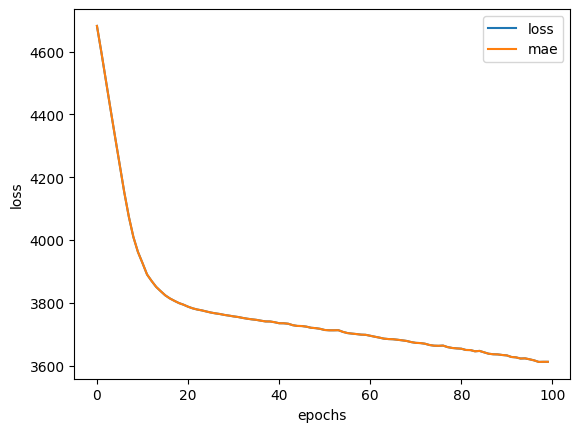

In [469]:
pd.DataFrame(history_2.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [470]:
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [471]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [472]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = ColumnTransformer([
    ("min_max", MinMaxScaler(), ['age', 'bmi', 'children']),
    ("one_hot_encoder",OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
])

In [473]:
X = df.drop(columns=['charges'], axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [474]:
X_train_norm = ct.fit_transform(X_train)
X_test_norm = ct.transform(X_test)

In [475]:
X_train_norm

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [476]:
X_test_norm

array([[0.58695652, 0.24791499, 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.39130435, 0.37826204, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.29391983, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.43478261, 0.32458972, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.7826087 , 0.84611246, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.7173913 , 0.49071832, 0.2       , ..., 0.        , 0.        ,
        1.        ]])

In [477]:
tf.random.set_seed(42)


df_model_3 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
    ]
)

df_model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

df_model_3.fit(X_train_norm, y_train, epochs=100, verbose=0)

In [478]:
df_model_3.evaluate(X_test_norm, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3519.4153 - mae: 3519.4153  


[3433.910888671875, 3433.910888671875]

# Exercises

### 1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.

#### Data loading and preprocessing

In [479]:
dataset_path = kagglehub.dataset_download('franciscogcc/financial-data')
csv_file_path = f'{dataset_path}/financial_regression.csv'
df = pd.read_csv(csv_file_path)

Using Colab cache for faster access to the 'financial-data' dataset.


In [480]:
df.head()

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
2,2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-19,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,...,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0
4,2010-01-20,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,...,47.31,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0


In [481]:
df.shape

(3904, 47)

In [482]:
df.drop(columns=['date','us_rates_%','CPI','GDP','usd_chf','eur_usd'], inplace=True)

In [483]:
df.isna().sum()

,0
sp500 open,185
sp500 high,185
sp500 low,185
sp500 close,185
sp500 volume,185
sp500 high-low,185
nasdaq open,185
nasdaq high,185
nasdaq low,185
nasdaq close,185


In [484]:
df.dropna(inplace=True)

In [485]:
df.shape

(3719, 41)

In [486]:
df.isnull().sum()

,0
sp500 open,0
sp500 high,0
sp500 low,0
sp500 close,0
sp500 volume,0
sp500 high-low,0
nasdaq open,0
nasdaq high,0
nasdaq low,0
nasdaq close,0


In [487]:
df.duplicated().sum()

np.int64(0)

In [488]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [489]:
X = df.drop(columns=['gold high'])
y = df['gold high']

In [490]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [491]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [492]:
df.shape

(3719, 41)

In [493]:
X_train_scaled.shape

(2975, 40)

#### model with 2 hidden layers on custom regression dataset

In [494]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(40,)),
        tf.keras.layers.Dense(50),
        tf.keras.layers.Dense(1)
    ]
)

In [495]:
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

In [496]:
model.summary()

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_104 (Dense)               │ (None, 50)             │         2,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,101 (8.21 KB)

 Trainable params: 2,101 (8.21 KB)

 Non-trainable params: 0 (0.00 B)

In [497]:
history = model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.1, verbose=0)

In [498]:
y.max()

253.94

In [499]:
y.min()

100.99

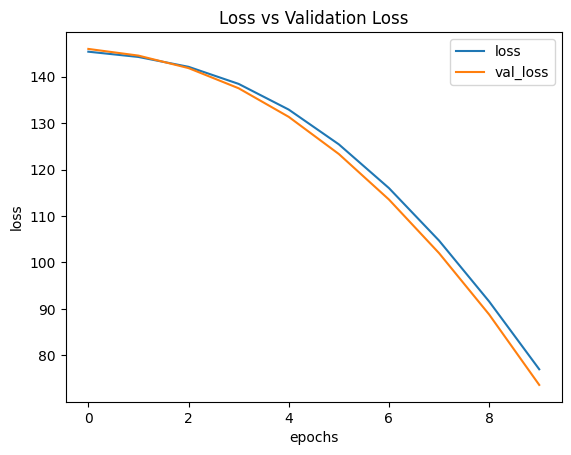

In [500]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss vs Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

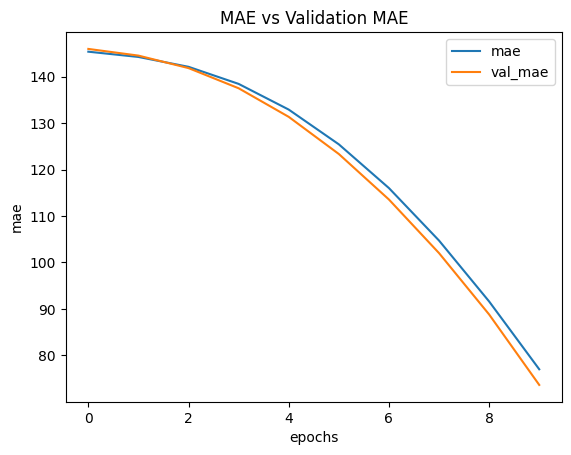

In [501]:
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label='val_mae')
plt.title('MAE vs Validation MAE')
plt.xlabel('epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

### 2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?

#### Model with 4 Dense layers on custom regression dataset

In [502]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(40,)),
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(50),
        tf.keras.layers.Dense(25),
        tf.keras.layers.Dense(1)
    ]
)

In [503]:
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

In [504]:
model.summary()

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_106 (Dense)               │ (None, 100)            │         4,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [505]:
history = model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.1, verbose=0)

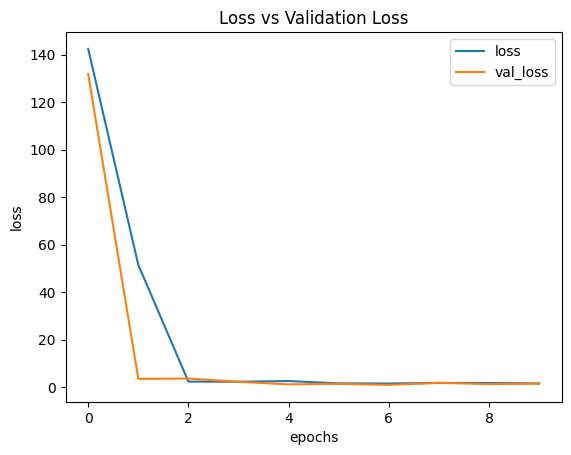

In [506]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss vs Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

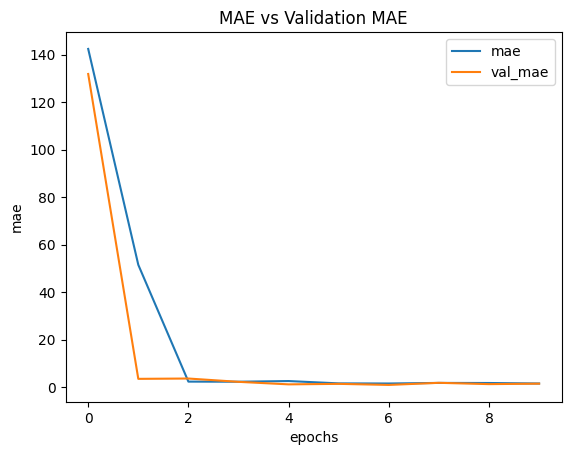

In [507]:
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label='val_mae')
plt.title('MAE vs Validation MAE')
plt.xlabel('epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

---

### 3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
- Building a larger model (how does one with 4 dense layers go?).
- Increasing the number of units in each layer.
- Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x?
- What happens if you train for longer (say 300 epochs instead of 200)?

#### Data Loading and preprocessing

In [508]:
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [509]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [510]:
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [511]:
df.shape

(1338, 7)

In [512]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], dtype=int)

In [513]:
df.shape

(1338, 12)

In [514]:
df.duplicated().sum()

np.int64(1)

In [515]:
df.drop_duplicates(inplace=True)

In [516]:
X = df.drop(columns=['charges'])
y = df['charges']

In [517]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [518]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [519]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [520]:
X_train_scaled.shape

(2975, 40)

#### Model Building, Training and Evaluation

In [521]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(40,)),
        tf.keras.layers.Dense(15),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(5),
        tf.keras.layers.Dense(1),
    ]
)

In [522]:
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

In [523]:
model.summary()

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_110 (Dense)               │ (None, 15)             │           615 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 836 (3.27 KB)

 Trainable params: 836 (3.27 KB)

 Non-trainable params: 0 (0.00 B)

In [524]:
history = model.fit(X_train_scaled, y_train, epochs=300, verbose=0)

In [525]:
model.evaluate(X_test_scaled, y_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4874 - mae: 0.4874  


[0.47187209129333496, 0.47187209129333496]

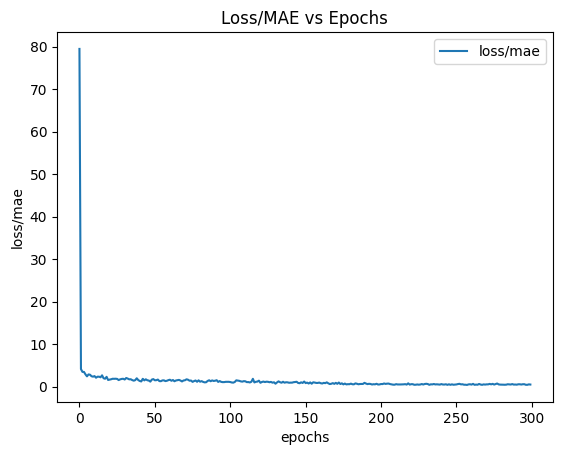

In [526]:
plt.plot(history.history['loss'], label='loss/mae')
plt.title('Loss/MAE vs Epochs')
plt.xlabel('epochs')
plt.ylabel('loss/mae')
plt.legend()
plt.show()

---

### 4. Import the Boston pricing dataset from TensorFlow tf.keras.datasets and model it.

#### Data Loading and Preprocessing

In [527]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path="boston_housing.npz", 
    test_split=0.2, 
    seed=113
)

In [528]:
X_train.shape

(404, 13)

In [529]:
X_test.shape

(102, 13)

In [530]:
y_train.shape

(404,)

In [531]:
y_test.shape

(102,)

#### Model Building, training and evaluation

In [532]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(13,)),
        tf.keras.layers.Dense(50),
        tf.keras.layers.Dense(30),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
    ]
)

In [533]:
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

In [534]:
model.summary()

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_114 (Dense)               │ (None, 50)             │           700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_116 (Dense)               │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_117 (Dense)               │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,551 (9.96 KB)

 Trainable params: 2,551 (9.96 KB)

 Non-trainable params: 0 (0.00 B)

In [535]:
history = model.fit(X_train, y_train, epochs=100, verbose=0)

In [536]:
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.8403 - mae: 4.8403  


[5.347555637359619, 5.347555637359619]

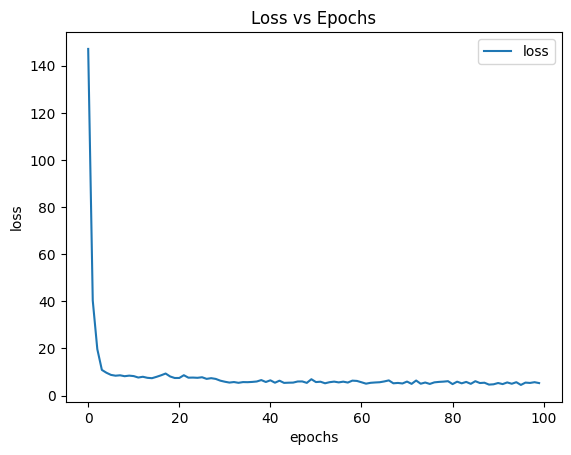

In [537]:
plt.plot(history.history['loss'], label='loss')
plt.title('Loss vs Epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()